In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df= pd.read_csv("Salary Data.csv")

In [3]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


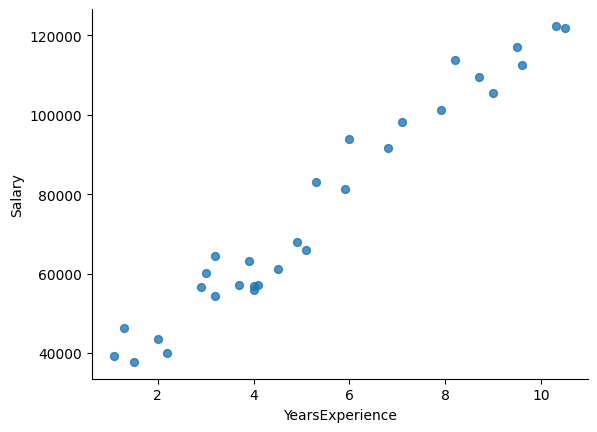

In [4]:
# @title YearsExperience vs Salary

from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

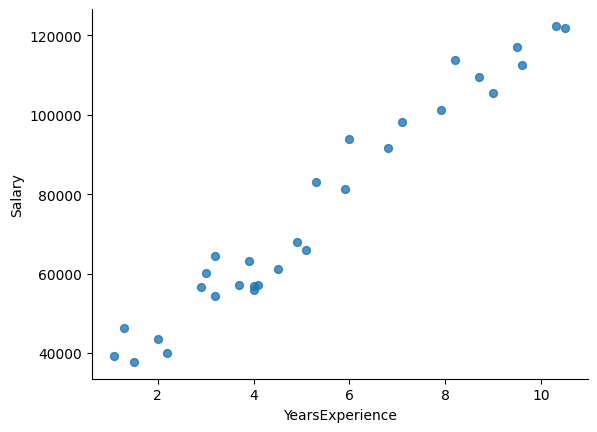

In [5]:
from matplotlib import pyplot as plt
df.plot(kind='scatter', x='YearsExperience', y='Salary', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [6]:
!pip install flaml


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.3/313.3 kB 6.4 MB/s eta 0:00:00


In [8]:
import pandas as pd
from flaml import AutoML



# Split data into features and target variable
X = df[['YearsExperience']]  # Features
y = df['Salary']  # Target variable

# Initialize AutoML
automl = AutoML()

# Specify the task and model search space
automl_settings = {
    "time_budget": 60,  # Total time budget in seconds
    "metric": 'rmse',  # Metric to optimize for regression
    "task": 'regression',  # Specify the task type
}

# Train the model
automl.fit(X_train=X, y_train=y, **automl_settings)

# Print the best model and its RMSE
print("Best model:", automl.best_estimator)
print("Best RMSE:", automl.best_loss)

# (Optional) Make predictions
# predictions = automl.predict(X)
# print("Predictions:", predictions)


[flaml.automl.logger: 10-07 10:46:27] {1728} INFO - task = regression
[flaml.automl.logger: 10-07 10:46:27] {1739} INFO - Evaluation method: cv
[flaml.automl.logger: 10-07 10:46:27] {1838} INFO - Minimizing error metric: rmse
[flaml.automl.logger: 10-07 10:46:27] {1955} INFO - List of ML learners in AutoML Run: ['lgbm', 'rf', 'xgboost', 'extra_tree', 'xgb_limitdepth', 'sgd']
[flaml.automl.logger: 10-07 10:46:27] {2258} INFO - iteration 0, current learner lgbm
[flaml.automl.logger: 10-07 10:46:27] {2393} INFO - Estimated sufficient time budget=335s. Estimated necessary time budget=2s.
[flaml.automl.logger: 10-07 10:46:27] {2442} INFO -  at 0.1s,	estimator lgbm's best error=27275.5991,	best estimator lgbm's best error=27275.5991
[flaml.automl.logger: 10-07 10:46:27] {2258} INFO - iteration 1, current learner lgbm
[flaml.automl.logger: 10-07 10:46:27] {2442} INFO -  at 0.1s,	estimator lgbm's best error=27275.5991,	best estimator lgbm's best error=27275.5991
[flaml.automl.logger: 10-07 10:

INFO:flaml.tune.searcher.blendsearch:No low-cost partial config given to the search algorithm. For cost-frugal search, consider providing low-cost values for cost-related hps via 'low_cost_partial_config'. More info can be found at https://microsoft.github.io/FLAML/docs/FAQ#about-low_cost_partial_config-in-tune


[flaml.automl.logger: 10-07 10:46:27] {2442} INFO -  at 0.2s,	estimator sgd's best error=80086.1344,	best estimator lgbm's best error=27275.5991
[flaml.automl.logger: 10-07 10:46:27] {2258} INFO - iteration 3, current learner sgd
[flaml.automl.logger: 10-07 10:46:27] {2442} INFO -  at 0.2s,	estimator sgd's best error=80086.1344,	best estimator lgbm's best error=27275.5991
[flaml.automl.logger: 10-07 10:46:27] {2258} INFO - iteration 4, current learner lgbm
[flaml.automl.logger: 10-07 10:46:27] {2442} INFO -  at 0.3s,	estimator lgbm's best error=21300.9398,	best estimator lgbm's best error=21300.9398
[flaml.automl.logger: 10-07 10:46:27] {2258} INFO - iteration 5, current learner xgboost
[flaml.automl.logger: 10-07 10:46:27] {2442} INFO -  at 0.3s,	estimator xgboost's best error=20383.1304,	best estimator xgboost's best error=20383.1304
[flaml.automl.logger: 10-07 10:46:27] {2258} INFO - iteration 6, current learner extra_tree
[flaml.automl.logger: 10-07 10:46:27] {2442} INFO -  at 0.5s

RMSE: 5592.043608760661
Equation of the line: Salary = 25792.20 + 9449.96 * YearsExperience


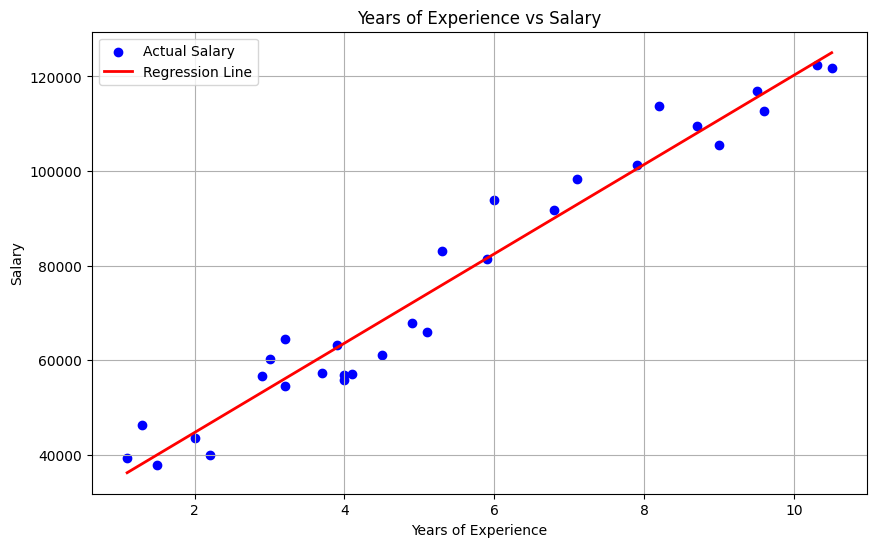

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



# Split data into features and target variable
X = df[['YearsExperience']]  # Features
y = df['Salary']  # Target variable

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
y_pred = model.predict(X)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y, y_pred))

# Get the coefficients for the equation
slope = model.coef_[0]
intercept = model.intercept_
equation = f"Salary = {intercept:.2f} + {slope:.2f} * YearsExperience"

# Print the RMSE and the equation of the line
print("RMSE:", rmse)
print("Equation of the line:", equation)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Salary')
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()
plt.grid()
plt.show()


In [10]:
!pip install h2o


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 1.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.46.0.5-py2.py3-none-any.whl size=265646558 sha256=17716afd914d8beaeb4b7025bbb4f62fbbee79ced67e7529e88fa67ed5a22607
  Stored in directory: /root/.cache/pip/wheels/1a/46/4f/9b366522399306d7849672d58aefb44c9b73378d710bde2853
Successfully built h2o


In [14]:
!pip install lazypredict

In [15]:
import lazypredict

In [23]:
!pip install scikit-learn --upgrade
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



# Split data into features and target variable
X = df[['YearsExperience']]  # Features
y = df['Salary']  # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)

# Fit the LazyRegressor
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Print model performance metrics
print(models)





 81%|████████  | 34/42 [00:01<00:00, 34.08it/s]

OrthogonalMatchingPursuitCV model failed to execute
Found array with 1 feature(s) (shape=(9, 1)) while a minimum of 2 is required by OrthogonalMatchingPursuitCV.


100%|██████████| 42/42 [00:01<00:00, 30.56it/s]

                               Adjusted R-Squared  R-Squared     RMSE  \
Model                                                                   
AdaBoostRegressor                             NaN        NaN  5000.00   
BaggingRegressor                              NaN        NaN  4000.00   
BayesianRidge                                 NaN        NaN 26666.67   
DecisionTreeRegressor                         NaN        NaN  5000.00   
DummyRegressor                                NaN        NaN 26666.67   
ElasticNet                                    NaN        NaN  6846.35   
ElasticNetCV                                  NaN        NaN 25325.83   
ExtraTreeRegressor                            NaN        NaN  5000.00   
ExtraTreesRegressor                           NaN        NaN  3100.00   
GammaRegressor                                NaN        NaN 12744.41   
GaussianProcessRegressor                      NaN        NaN   173.92   
GradientBoostingRegressor                     NaN  

#Ridge regression is the best model